In [1]:
import os 
os.chdir('..')

In [2]:
#from ordpy import permutation_entropy

#pe_value=permutation_entropy(x, dx=5) 
#x is the time series and dx is the permutation order. 
# Usual convention is (dx)!<<N, where N is the number of data points.
# I think dx=6 is okay.

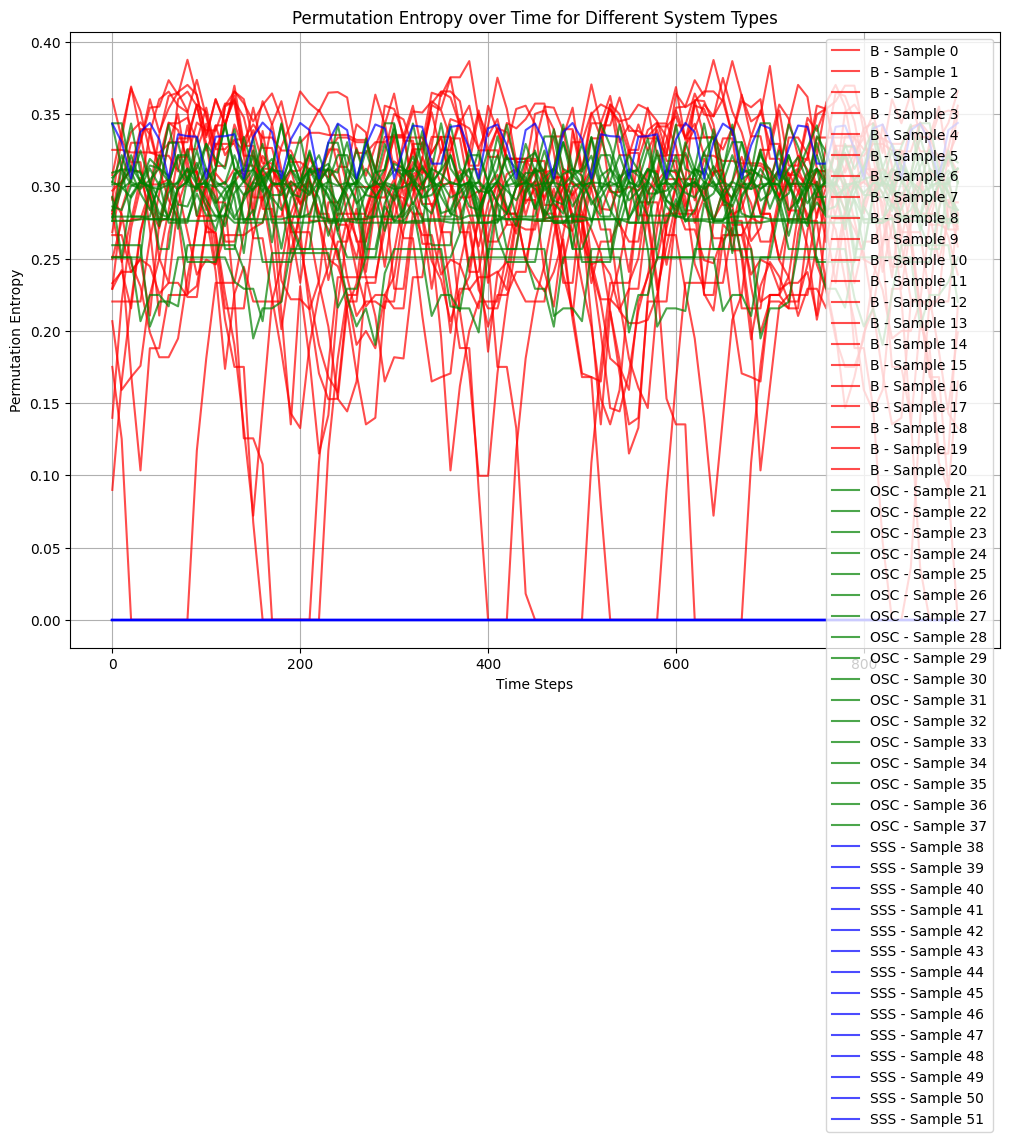

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from utils.data_utils import load_data, split_data
from utils.visualizer import *
from ordpy import permutation_entropy  # Assuming this is a function you have or can implement

# Define system types and parameters
system_types = ['B', 'OSC', 'SSS']
V = np.inf
max_samples = 1

# Load the data
data, labels, beta_epsilon_pairs = load_data(system_types, V, max_samples)
train_data, test_data, train_labels, test_labels, train_pairs, test_pairs = split_data(data, labels, beta_epsilon_pairs, option="option2", balanced=True)

# Set parameters for permutation entropy calculation
dx = 4  # Embedding dimension for permutation entropy
sliding_window_size = 100  # Sliding window size
step_size = 10  # Step size for sliding window
colors = {'B': 'r', 'OSC': 'g', 'SSS': 'b'}  # Define different colors for each system type

# Initialize the plot
plt.figure(figsize=(12, 8))

# Function to compute permutation entropy in a sliding window
def sliding_window_pe(trajectory, dx, window_size, step_size):
    pe_values = []
    for i in range(0, len(trajectory) - window_size + 1, step_size):
        window_data = trajectory[i:i + window_size]  # Extract the window
        pe_value = permutation_entropy(window_data, dx=dx)  # Compute PE for the window
        pe_values.append(pe_value)
    return pe_values

# Loop through each system type and compute permutation entropy
for system_type in system_types:
    system_indices = [i for i, label in enumerate(train_labels) if label == system_type]  # Filter train data by system type
    for idx in system_indices:
        trajectory = train_data[idx]  # Extract the trajectory (e.g., 'x' dimension)
        
        # Compute permutation entropy with sliding window
        pe_values = sliding_window_pe(trajectory, dx, sliding_window_size, step_size)
        
        # Plot the permutation entropy for this trajectory over time
        time_steps = range(0, len(trajectory) - sliding_window_size + 1, step_size)
        plt.plot(time_steps, pe_values, label=f'{system_type} - Sample {idx}', color=colors[system_type], alpha=0.7)

# Customize plot appearance
plt.title('Permutation Entropy over Time for Different System Types')
plt.xlabel('Time Steps')
plt.ylabel('Permutation Entropy')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

